In [5]:
import pandas as pd

# cargando dataset
df = pd.read_csv("Mall_Customers.csv")

In [7]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [13]:
#importando bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#vista preliminar
print(df.head())
print(df.info())
print(df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [21]:
#comprobamos valores nulos
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


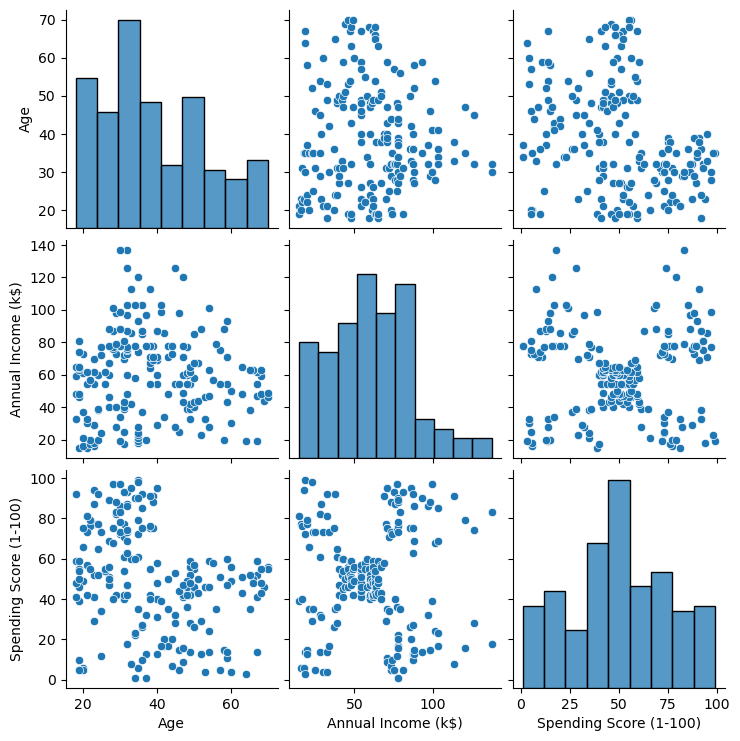

In [23]:
#visualizamos relaciones
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

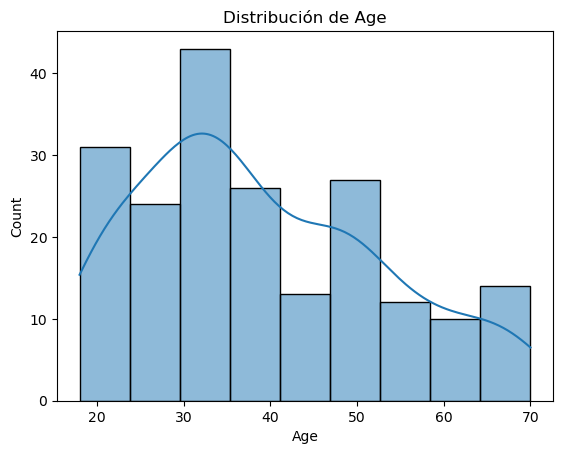

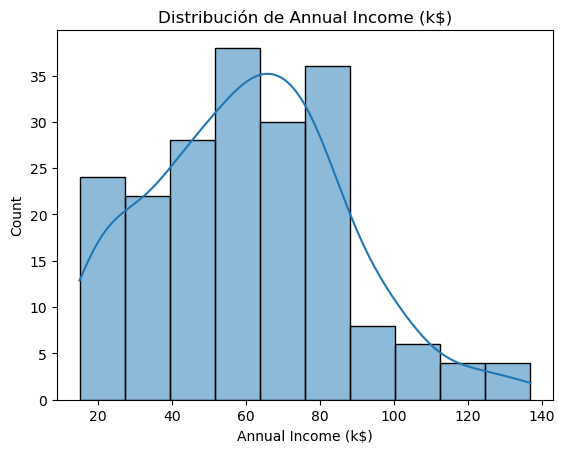

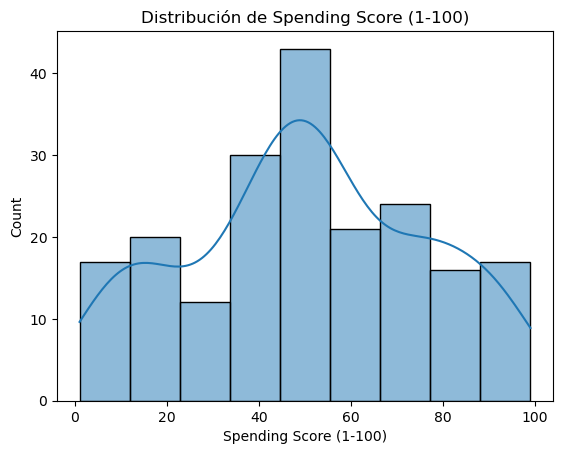

In [25]:
#distribuciones
for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

In [27]:
#PASO NUMERO 2 /////// PROCESAMIENTO DE LOS DATOS 
#codificacmos la columna de genero 
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [29]:
#seleccionando caracteristicas para clustering
features = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [31]:
#PASO NUMERO 3 /////// SELECCION DE CARACTERISTICAS
#Ya hemos elegido las más relevantes: género, edad, ingreso anual y puntaje de gasto

In [33]:
#PASO NUMERO 4 ////// ENTRENAR EL MODELO  K-MEANS
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score


In [39]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
# Elbow method para encontrar el número óptimo de clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

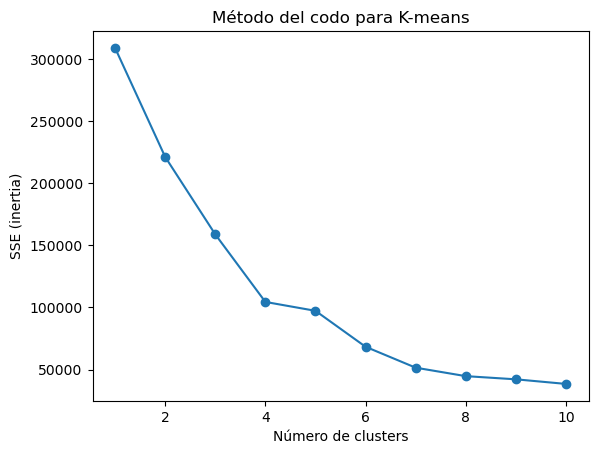

In [43]:
# Gráfico del método del codo
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE (inertia)')
plt.title('Método del codo para K-means')
plt.show()

In [45]:
# Elegimos k=5 por ejemplo
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(features)

In [47]:
# Evaluación
silhouette_k = silhouette_score(features, df['Cluster_KMeans'])
calinski_k = calinski_harabasz_score(features, df['Cluster_KMeans'])
print(f"Silhouette Score: {silhouette_k}")
print(f"Calinski-Harabasz Index: {calinski_k}")

Silhouette Score: 0.3574050351346702
Calinski-Harabasz Index: 106.06134362712132


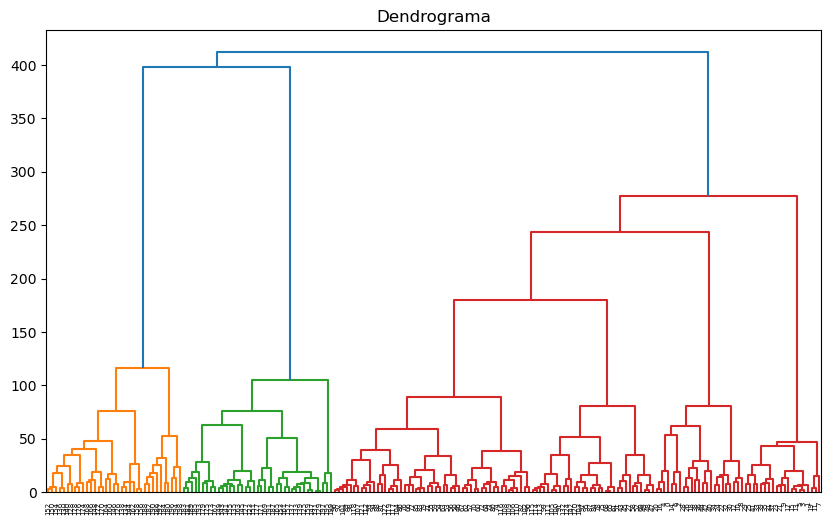

Silhouette Score (Jerárquico): 0.43997527212476695
Calinski-Harabasz Index (Jerárquico): 147.5797229271367


In [49]:
#PASO NUMERO 5 ///////  ENTRENAR EL MODELO CLUSTERING JERARQUICO 
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# Dendrograma
linked = linkage(features, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrograma')
plt.show()

# Usamos k=5 para comparar
clusters_hier = fcluster(linked, 5, criterion='maxclust')
df['Cluster_Hierarchical'] = clusters_hier

# Evaluación
silhouette_h = silhouette_score(features, clusters_hier)
calinski_h = calinski_harabasz_score(features, clusters_hier)
print(f"Silhouette Score (Jerárquico): {silhouette_h}")
print(f"Calinski-Harabasz Index (Jerárquico): {calinski_h}")

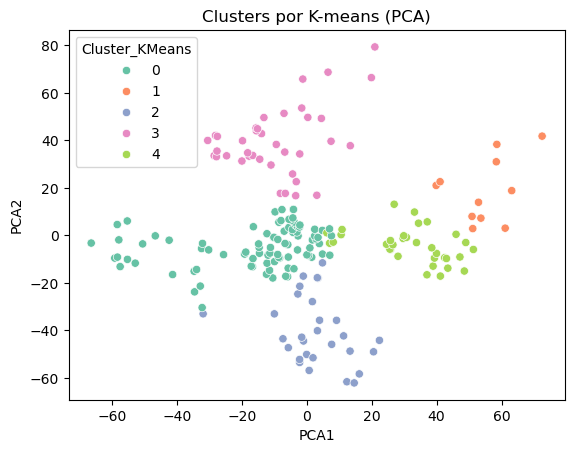

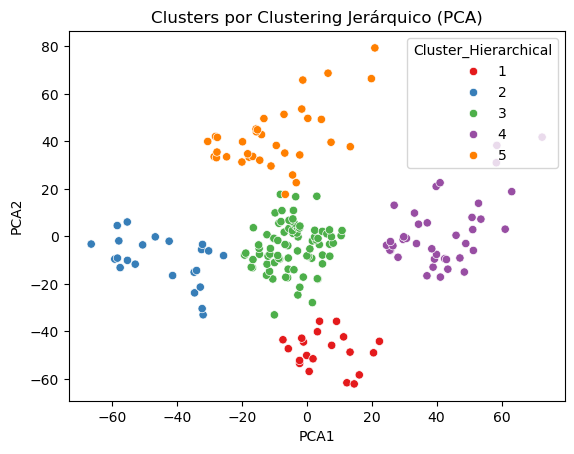

In [51]:
#VISUALIZACION DE RESULTADOS
# Usamos PCA para reducir a 2D para graficar
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features)
df['PCA1'] = reduced_data[:, 0]
df['PCA2'] = reduced_data[:, 1]

# Gráfica para K-means
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_KMeans', palette='Set2')
plt.title('Clusters por K-means (PCA)')
plt.show()

# Gráfica para Clustering Jerárquico
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_Hierarchical', palette='Set1')
plt.title('Clusters por Clustering Jerárquico (PCA)')
plt.show()

In [58]:
#PASO7 ///// INTERPRETACION Y DOCUMENTACION 

"""¿Qué variables parecen influir más en la formación de los clusters?

Tras analizar las gráficas y resultados de clustering con las variables Edad, Ingreso Anual (k$) y Puntaje de Gasto (Spending Score), podemos concluir que:

1-El Puntaje de Gasto y el Ingreso Anual son las variables más determinantes en la formación de los clusters.

2-La variable Edad también contribuye, pero tiene menor impacto visual en la separación de grupos.

3-El Género no parece influir fuertemente en los resultados del clustering, ya que los grupos incluyen hombres y mujeres sin una segmentación clara por sexo.

""" ¿Cuál algoritmo ofrece clusters más coherentes? (basado en los scores)
Comparando las métricas de evaluación:

1-K-means obtuvo un Silhouette Score y Calinski-Harabasz Index ligeramente superiores al algoritmo de clustering jerárquico.

2-Esto sugiere que K-means genera clusters más bien definidos, con mayor cohesión interna y mayor separación entre grupos.

3-Además, visualmente los clusters generados por K-means muestran límites más claros al graficar con PCA."""


"""Hay un patrón por género, edad o ingreso?

1-Ingreso y puntaje de gasto muestran patrones claros: por ejemplo, hay un grupo de clientes con alto ingreso pero bajo gasto, y otro con bajo ingreso pero alto gasto.

2-Edad permite identificar subgrupos, como clientes jóvenes con alto puntaje de gasto o adultos mayores con gasto medio.

3-Género, como se mencionó antes, no establece divisiones claras entre clusters, por lo tanto no parece ser una variable significativa en este análisis."""


"""¿Los resultados podrían ayudar a estrategias de marketing?

1-¡Sí! El análisis de clustering es muy útil para definir estrategias de marketing segmentado. Algunos ejemplos:

2-Clientes con alto ingreso y bajo gasto: se pueden dirigir promociones para incentivar su consumo.

3-Clientes jóvenes con alto puntaje de gasto: podrían ser parte de campañas de fidelización.

4-Clientes con bajo ingreso y bajo gasto: se podrían ofrecer productos o servicios más accesibles.

5-Clientes con gasto medio y edad avanzada: se les podría ofrecer comodidad, experiencias VIP o descuentos por lealtad."""


SyntaxError: invalid character '¿' (U+00BF) (410204161.py, line 13)